## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

C:\Users\YOUNIS\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
#del df_comp['spx']
#del df_comp['dax']
#del df_comp['ftse']
#del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [5]:
import warnings
warnings.filterwarnings("ignore")

## The LLR Test

In [6]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit(start_ar_lags = 11).llf
    L2 = mod_2.fit(start_ar_lags = 11).llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [7]:
df['returns'] = df.market_value.pct_change(1)*100

## ARIMA(1,1,1)

In [8]:
model_ar1_i1_ma1 = ARIMA(df.market_value, order=(1,1,1))
results_ar1_i1_ma1 = model_ar1_i1_ma1.fit()
results_ar1_i1_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Sun, 12 Apr 2020   AIC                          55215.333
Time:                        23:21:50   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5656      0.682      0.829      0.407      -0.772       1.903
ar.L1.D.market_value     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.D.market_value    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

## Residuals of the ARIMA(1,1,1)

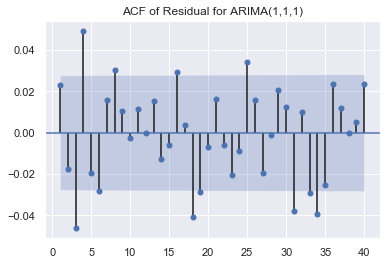

In [14]:
df['res_ar1_i1_ma1'] = results_ar1_i1_ma1.resid
sgt.plot_acf(df.res_ar1_i1_ma1[1:], zero=False, lags=40)
plt.title("ACF of Residual for ARIMA(1,1,1)")
plt.show()

## Higher-Lag ARIMA Models

In [24]:
model_ar1_i1_ma2 = ARIMA(df.market_value, order=(1,1,2))
results_ar1_i1_ma2 = model_ar1_i1_ma2.fit()
results_ar1_i1_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -27600.082
Method:                       css-mle   S.D. of innovations             59.091
Date:                Sun, 12 Apr 2020   AIC                          55210.164
Time:                        23:53:56   BIC                          55242.770
Sample:                    01-10-1994   HQIC                         55221.589
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5658      0.692      0.818      0.413      -0.790       1.922
ar.L1.D.market_value     0.5886      0.100      5.890      0.000       0.393       0.784
ma.L1.D.market_value    -0.6131      0.100     -6.138      0.000      -0.809      -0.417
ma.L2.D.market_value    -0.0457      0.016     -2.864      0.004      -0.077      -0.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6990           +0.0000j            1.6990            0.0000
MA.1            1.4700           +0.0000j            1.4700            0.0000
MA.2          -14.8753           +0.0000j           14.8753            0.5000
-----------------------------------------------------------------------------
"""

In [16]:
model_ar1_i1_ma3 = ARIMA(df.market_value, order=(1,1,3))
results_ar1_i1_ma3 = model_ar1_i1_ma3.fit()
results_ar1_i1_ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 3)   Log Likelihood              -27590.424
Method:                       css-mle   S.D. of innovations             58.978
Date:                Sun, 12 Apr 2020   AIC                          55192.848
Time:                        23:41:39   BIC                          55231.975
Sample:                    01-10-1994   HQIC                         55206.559
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5654      0.723      0.782      0.434      -0.851       1.982
ar.L1.D.market_value    -0.3585      0.125     -2.878      0.004      -0.603      -0.114
ma.L1.D.market_value     0.3386      0.124      2.730      0.006       0.096       0.582
ma.L2.D.market_value    -0.0590      0.015     -3.932      0.000      -0.088      -0.030
ma.L3.D.market_value    -0.1002      0.015     -6.866      0.000      -0.129      -0.072
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.7895           +0.0000j            2.7895            0.5000
MA.1           -1.5201           -1.3272j            2.0180           -0.3858
MA.2           -1.5201           +1.3272j            2.0180            0.3858
MA.3            2.4511           -0.0000j            2.4511           -0.0000
-----------------------------------------------------------------------------
"""

In [17]:
model_ar2_i1_ma1 = ARIMA(df.market_value, order=(2,1,1))
results_ar2_i1_ma1 = model_ar2_i1_ma1.fit()
results_ar2_i1_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -27599.807
Method:                       css-mle   S.D. of innovations             59.088
Date:                Sun, 12 Apr 2020   AIC                          55209.615
Time:                        23:42:09   BIC                          55242.221
Sample:                    01-10-1994   HQIC                         55221.041
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5658      0.694      0.815      0.415      -0.794       1.926
ar.L1.D.market_value     0.6298      0.094      6.708      0.000       0.446       0.814
ar.L2.D.market_value    -0.0471      0.016     -2.919      0.004      -0.079      -0.015
ma.L1.D.market_value    -0.6529      0.093     -7.000      0.000      -0.836      -0.470
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8413           +0.0000j            1.8413            0.0000
AR.2           11.5268           +0.0000j           11.5268            0.0000
MA.1            1.5317           +0.0000j            1.5317            0.0000
-----------------------------------------------------------------------------
"""

In [18]:
model_ar3_i1_ma1 = ARIMA(df.market_value, order=(3,1,1))
results_ar3_i1_ma1 = model_ar3_i1_ma1.fit()
results_ar3_i1_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(3, 1, 1)   Log Likelihood              -27592.055
Method:                       css-mle   S.D. of innovations             58.997
Date:                Sun, 12 Apr 2020   AIC                          55196.111
Time:                        23:48:56   BIC                          55235.238
Sample:                    01-10-1994   HQIC                         55209.821
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5639      0.740      0.762      0.446      -0.887       2.015
ar.L1.D.market_value    -0.4066      0.121     -3.357      0.001      -0.644      -0.169
ar.L2.D.market_value    -0.0585      0.015     -3.820      0.000      -0.089      -0.028
ar.L3.D.market_value    -0.0941      0.014     -6.635      0.000      -0.122      -0.066
ma.L1.D.market_value     0.3864      0.121      3.186      0.001       0.149       0.624
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7151           -0.0000j            1.7151           -0.5000
AR.2            0.5467           -2.4282j            2.4889           -0.2148
AR.3            0.5467           +2.4282j            2.4889            0.2148
MA.1           -2.5880           +0.0000j            2.5880            0.5000
-----------------------------------------------------------------------------
"""

In [21]:
model_ar3_i1_ma2 = ARIMA(df.market_value, order=(3,1,2))
results_ar3_i1_ma2 = model_ar3_i1_ma2.fit(start_ar_lags=5)
results_ar3_i1_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -27590.661
Method:                       css-mle   S.D. of innovations             58.980
Date:                Sun, 12 Apr 2020   AIC                          55195.322
Time:                        23:50:57   BIC                          55240.970
Sample:                    01-10-1994   HQIC                         55211.317
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5625      0.765      0.735      0.463      -0.938       2.063
ar.L1.D.market_value    -0.5774      0.122     -4.746      0.000      -0.816      -0.339
ar.L2.D.market_value    -0.4395      0.159     -2.764      0.006      -0.751      -0.128
ar.L3.D.market_value    -0.0967      0.015     -6.608      0.000      -0.125      -0.068
ma.L1.D.market_value     0.5593      0.122      4.580      0.000       0.320       0.799
ma.L2.D.market_value     0.3842      0.162      2.371      0.018       0.067       0.702
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4295           -1.6190j            1.6750           -0.2913
AR.2           -0.4295           +1.6190j            1.6750            0.2913
AR.3           -3.6862           -0.0000j            3.6862           -0.5000
MA.1           -0.7280           -1.4398j            1.6134           -0.3245
MA.2           -0.7280           +1.4398j            1.6134            0.3245
-----------------------------------------------------------------------------
"""

In [25]:
print("\n ARIMA(1,1,1): LL = ", results_ar1_i1_ma1.llf,"\t AIC  = ", results_ar1_i1_ma1.aic)
print("\n ARIMA(1,1,2): LL = ", results_ar1_i1_ma2.llf,"\t AIC  = ", results_ar1_i1_ma2.aic)
print("\n ARIMA(1,1,3): LL = ", results_ar1_i1_ma3.llf,"\t AIC  = ", results_ar1_i1_ma3.aic)
print("\n ARIMA(2,1,1): LL = ", results_ar2_i1_ma1.llf,"\t AIC  = ", results_ar2_i1_ma1.aic)
print("\n ARIMA(3,1,1): LL = ", results_ar3_i1_ma1.llf,"\t AIC  = ", results_ar3_i1_ma1.aic)
print("\n ARIMA(3,1,2): LL = ", results_ar3_i1_ma2.llf,"\t AIC  = ", results_ar3_i1_ma2.aic)



 ARIMA(1,1,1): LL =  -27603.66641277357 	 AIC  =  55215.33282554714

 ARIMA(1,1,2): LL =  -27600.08186311896 	 AIC  =  55210.16372623792

 ARIMA(1,1,3): LL =  -27590.42403262721 	 AIC  =  55192.84806525442

 ARIMA(2,1,1): LL =  -27599.807487848615 	 AIC  =  55209.61497569723

 ARIMA(3,1,1): LL =  -27592.05537170391 	 AIC  =  55196.11074340782

 ARIMA(3,1,2): LL =  -27590.660808969737 	 AIC  =  55195.32161793947


In [26]:
print("\n LLR Test P-value = "+ str(LLR_test(model_ar1_i1_ma2,model_ar1_i1_ma3)))


 LLR Test P-value = 0.0


In [27]:
print("\n LLR Test P-value = "+ str(LLR_test(model_ar1_i1_ma1,model_ar1_i1_ma3,DF=2)))


 LLR Test P-value = 0.0


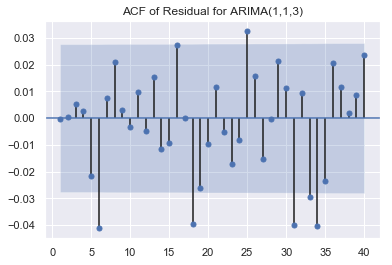

In [28]:
df['res_ar1_i1_ma3'] = results_ar1_i1_ma3.resid
sgt.plot_acf(df.res_ar1_i1_ma3[1:], zero=False, lags=40)
plt.title("ACF of Residual for ARIMA(1,1,3)")
plt.show()

In [30]:
model_ar5_i1_ma1 = ARIMA(df.market_value, order=(5,1,1))
results_ar5_i1_ma1 = model_ar5_i1_ma1.fit(start_ar_lags=7)
results_ar5_i1_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -27586.512
Method:                       css-mle   S.D. of innovations             58.932
Date:                Mon, 13 Apr 2020   AIC                          55189.024
Time:                        00:26:54   BIC                          55241.193
Sample:                    01-10-1994   HQIC                         55207.305
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5663      0.690      0.820      0.412      -0.787       1.919
ar.L1.D.market_value     0.4011      0.159      2.529      0.011       0.090       0.712
ar.L2.D.market_value    -0.0445      0.016     -2.856      0.004      -0.075      -0.014
ar.L3.D.market_value    -0.0543      0.017     -3.163      0.002      -0.088      -0.021
ar.L4.D.market_value     0.0586      0.019      3.069      0.002       0.021       0.096
ar.L5.D.market_value    -0.0581      0.014     -4.118      0.000      -0.086      -0.030
ma.L1.D.market_value    -0.4213      0.158     -2.659      0.008      -0.732      -0.111
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7609           -0.0000j            1.7609           -0.5000
AR.2            1.4633           -0.8605j            1.6975           -0.0846
AR.3            1.4633           +0.8605j            1.6975            0.0846
AR.4           -0.0790           -1.8393j            1.8410           -0.2568
AR.5           -0.0790           +1.8393j            1.8410            0.2568
MA.1            2.3734           +0.0000j            2.3734            0.0000
-----------------------------------------------------------------------------
"""

In [31]:
model_ar6_i1_ma3 = ARIMA(df.market_value, order=(6,1,3))
results_ar6_i1_ma3 = model_ar6_i1_ma3.fit(start_ar_lags=7)
results_ar6_i1_ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(6, 1, 3)   Log Likelihood              -27581.455
Method:                       css-mle   S.D. of innovations             58.872
Date:                Mon, 13 Apr 2020   AIC                          55184.911
Time:                        00:27:52   BIC                          55256.644
Sample:                    01-10-1994   HQIC                         55210.047
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5682      0.649      0.876      0.381      -0.704       1.840
ar.L1.D.market_value     1.1252      0.075     15.072      0.000       0.979       1.271
ar.L2.D.market_value    -1.0691      0.077    -13.911      0.000      -1.220      -0.918
ar.L3.D.market_value     0.7753      0.078      9.986      0.000       0.623       0.928
ar.L4.D.market_value     0.0725      0.028      2.611      0.009       0.018       0.127
ar.L5.D.market_value    -0.0864      0.024     -3.630      0.000      -0.133      -0.040
ar.L6.D.market_value     0.0795      0.017      4.679      0.000       0.046       0.113
ma.L1.D.market_value    -1.1467      0.073    -15.636      0.000      -1.290      -1.003
ma.L2.D.market_value     1.0459      0.075     13.882      0.000       0.898       1.194
ma.L3.D.market_value    -0.8189      0.073    -11.194      0.000      -0.962      -0.676
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0581           -0.0000j            1.0581           -0.0000
AR.2            0.0900           -1.0615j            1.0654           -0.2365
AR.3            0.0900           +1.0615j            1.0654            0.2365
AR.4           -2.2750           -0.0000j            2.2750           -0.5000
AR.5            1.0620           -1.8651j            2.1463           -0.1676
AR.6            1.0620           +1.8651j            2.1463            0.1676
MA.1            1.0507           -0.0000j            1.0507           -0.0000
MA.2            0.1133           -1.0721j            1.0781           -0.2332
MA.3            0.1133           +1.0721j            1.0781            0.2332
-----------------------------------------------------------------------------
"""

In [32]:
print("\n ARIMA(1,1,3): LL = ", results_ar1_i1_ma3.llf,"\t AIC  = ", results_ar1_i1_ma3.aic)
print("\n ARIMA(5,1,1): LL = ", results_ar5_i1_ma1.llf,"\t AIC  = ", results_ar5_i1_ma1.aic)
print("\n ARIMA(6,1,3): LL = ", results_ar6_i1_ma3.llf,"\t AIC  = ", results_ar6_i1_ma3.aic)


 ARIMA(1,1,3): LL =  -27590.42403262721 	 AIC  =  55192.84806525442

 ARIMA(5,1,1): LL =  -27586.51188810529 	 AIC  =  55189.02377621058

 ARIMA(6,1,3): LL =  -27581.455478177362 	 AIC  =  55184.910956354724


In [34]:
print("\n LLR Test P-value = "+ str(LLR_test(model_ar1_i1_ma3,model_ar6_i1_ma3,DF=5)))


 LLR Test P-value = 0.018


In [36]:
print("\n LLR Test P-value = "+ str(LLR_test(model_ar5_i1_ma1,model_ar6_i1_ma3,DF=3)))


 LLR Test P-value = 0.117


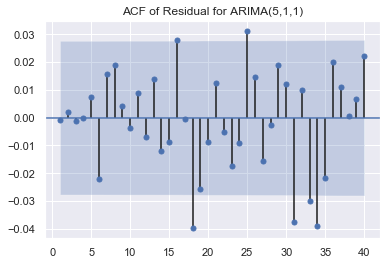

In [37]:
df['res_ar5_i1_ma1'] = results_ar5_i1_ma1.resid
sgt.plot_acf(df.res_ar5_i1_ma1[1:], zero=False, lags=40)
plt.title("ACF of Residual for ARIMA(5,1,1)")
plt.show()

## Models with Higher Levels of Integration

In [38]:
df["dela_prices"] = df.market_value.diff(1)

In [41]:
model_ar1_i0_ma1 = ARIMA(df.dela_prices[1:], order=(1,0,1))
results_ar1_i0_ma1 = model_ar1_i0_ma1.fit()
results_ar1_i0_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            dela_prices   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Mon, 13 Apr 2020   AIC                          55215.333
Time:                        00:48:30   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5656      0.682      0.829      0.407      -0.772       1.903
ar.L1.dela_prices     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.dela_prices    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

In [42]:
sts.adfuller(df.dela_prices[1:])

(-32.2440934957075,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54845.96104221891)

In [49]:
model_ar1_i2_ma1 = ARIMA(df.market_value, order=(1,2,1))
results_ar1_i2_ma1 = model_ar1_i2_ma1.fit(start_ar_lags=10)
results_ar1_i2_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D2.market_value   No. Observations:                 5019
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -27614.158
Method:                       css-mle   S.D. of innovations             59.272
Date:                Mon, 13 Apr 2020   AIC                          55236.316
Time:                        00:53:40   BIC                          55262.400
Sample:                    01-11-1994   HQIC                         55245.457
                         - 04-05-2013                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0001      0.001     -0.196      0.845      -0.001       0.001
ar.L1.D2.market_value    -0.0178      0.014     -1.263      0.207      -0.045       0.010
ma.L1.D2.market_value    -1.0000      0.001  -1717.283      0.000      -1.001      -0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -56.1053           +0.0000j           56.1053            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

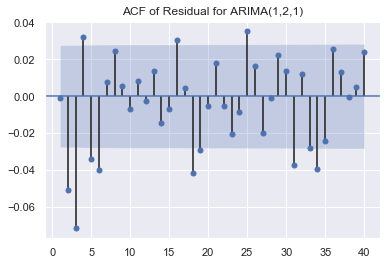

In [51]:
df['results_ar1_i2_ma1'] = results_ar1_i2_ma1.resid
sgt.plot_acf(df.results_ar1_i2_ma1[2:], zero=False, lags=40)
plt.title("ACF of Residual for ARIMA(1,2,1)")
plt.show()

## ARIMAX 

In [53]:
model_ar1_i1_ma1_xspx = ARIMA(df.market_value,exog=df.spx, order=(1,1,1))
results_ar1_i1_ma1_xspx = model_ar1_i1_ma1_xspx.fit()
results_ar1_i1_ma1_xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.556
Method:                       css-mle   S.D. of innovations             59.132
Date:                Mon, 13 Apr 2020   AIC                          55217.112
Time:                        01:26:26   BIC                          55249.718
Sample:                    01-10-1994   HQIC                         55228.538
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5884      2.655     -0.222      0.825      -5.791       4.615
spx                      0.0011      0.002      0.451      0.652      -0.004       0.006
ar.L1.D.market_value     0.7462      0.070     10.602      0.000       0.608       0.884
ma.L1.D.market_value    -0.7923      0.064    -12.305      0.000      -0.918      -0.666
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3400           +0.0000j            1.3400            0.0000
MA.1            1.2622           +0.0000j            1.2622            0.0000
-----------------------------------------------------------------------------
"""

## SARIMAX 

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [55]:
model_sarimax = SARIMAX(df.market_value,exog=df.spx, order=(1,0,1),seasonal_order=(2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 5021
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26712.840
Date:                           Mon, 13 Apr 2020   AIC                          53439.679
Time:                                   01:48:06   BIC                          53485.329
Sample:                               01-07-1994   HQIC                         53455.676
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6861      0.035     76.718      0.000       2.618       2.755
ar.L1          0.9999      0.000   2731.338      0.000       0.999       1.001
ma.L1         -0.3091      0.009    -32.935      0.000      -0.328      -0.291
ar.S.L5        0.9597      0.005    187.221      0.000       0.950       0.970
ar.S.L10       0.0401      0.004     10.710      0.000       0.033       0.047
ma.S.L5       -0.9991      0.006   -157.981      0.000      -1.011      -0.987
sigma2      2415.1227     28.137     85.835      0.000    2359.976    2470.270
===================================================================================
Ljung-Box (Q):                       96.04   Jarque-Bera (JB):              4182.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""